In [1]:
import numpy as np
from urllib import request
import gzip
import pickle

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()

def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

if __name__ == '__main__':
    init()

Download complete.
Save complete.


In [2]:
init()

Download complete.
Save complete.


In [57]:
x_train, y_train, x_test, y_test = load()

In [58]:
x_train.shape

(60000, 784)

In [59]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [63]:
y_train.shape

(60000,)

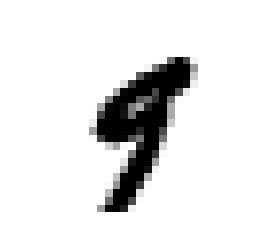

9

In [65]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = x_train[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

y_train[36000]

In [66]:
import numpy as np

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [67]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [68]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [69]:
sgd_clf.predict([some_digit])

array([False])

In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.9671 , 0.96165, 0.95705])

In [74]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

In [75]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.9112 , 0.90845, 0.9093 ])

In [76]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54175,   404],
       [ 1880,  3541]], dtype=int64)

In [79]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8975918884664131

In [81]:
recall_score(y_train_5, y_train_pred)

0.653200516509869

In [82]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7561392269912448

In [83]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-226172.12787611])

In [84]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [85]:
y_some_digit_pred

array([False])

In [93]:
threshold=-200000
y_some_digit_pred = (y_scores > threshold)

In [94]:
y_some_digit_pred

array([False, False, False, ..., False, False, False])

In [95]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method = "decision_function")

In [96]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

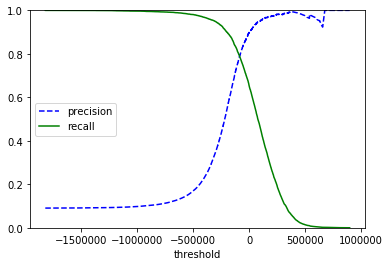

In [99]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="recall")
    plt.xlabel("threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

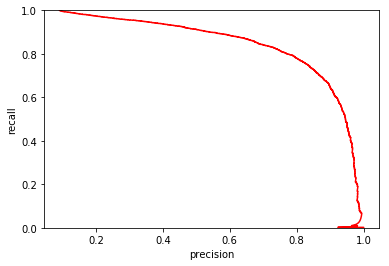

In [101]:
def plot_precision_recall_vs_threshold2(precisions, recalls, thresholds):
    plt.plot(precisions[:-1], recalls[:-1], "r-")
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold2(precisions, recalls, thresholds)
plt.show()

In [102]:
y_train_pred_90 = (y_scores > 70000)

In [103]:
precision_score(y_train_5, y_train_pred_90)

0.9439946018893387

In [104]:
recall_score(y_train_5, y_train_pred_90)

0.5161409334071204

In [105]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

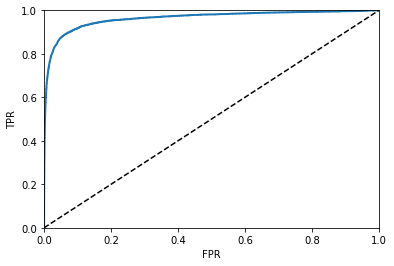

In [106]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

plot_roc_curve(fpr, tpr)
plt.show()

In [107]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9634056881863868

In [108]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")

In [109]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

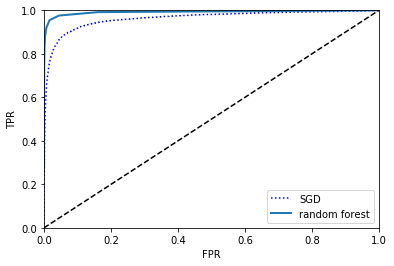

In [110]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "random forest")
plt.legend(loc="lower right")
plt.show()

In [111]:
roc_auc_score(y_train_5, y_scores_forest)

0.9922020533157633

In [112]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [113]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-734232.78796927, -489798.76100713, -719579.59061374,
         -75449.76691514,  -99002.68660983, -226172.12787611,
        -693701.85404698, -265380.47564202, -347694.0893998 ,
        -192114.27576312]])

In [114]:
np.argmax(some_digit_scores)

3

In [115]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [117]:
sgd_clf.classes_[5]

5

In [119]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([some_digit])

array([9], dtype=uint8)

In [121]:
len(ovo_clf.estimators_)

45

In [122]:
forest_clf.fit(x_train, y_train)
forest_clf.predict([some_digit])

array([9], dtype=uint8)

In [123]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.9]])

In [124]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.88357329, 0.87689384, 0.87418113])

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9090182 , 0.91264563, 0.90658599])

In [126]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5742,    2,   24,   10,   12,   45,   40,   10,   35,    3],
       [   2, 6459,   58,   28,    6,   43,    8,   11,  116,   11],
       [  57,   38, 5318,   99,   74,   26,  106,   62,  162,   16],
       [  48,   35,  154, 5329,    4,  232,   39,   53,  138,   99],
       [  20,   23,   38,    9, 5356,    9,   54,   33,   83,  217],
       [  77,   39,   33,  180,   71, 4625,  109,   30,  165,   92],
       [  31,   26,   38,    2,   45,  105, 5625,    7,   39,    0],
       [  21,   18,   75,   33,   57,   10,    5, 5830,   14,  202],
       [  53,  139,   79,  150,   16,  170,   61,   23, 5037,  123],
       [  42,   26,   29,   91,  170,   36,    2,  229,   80, 5244]],
      dtype=int64)

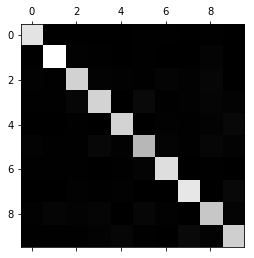

In [127]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [128]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

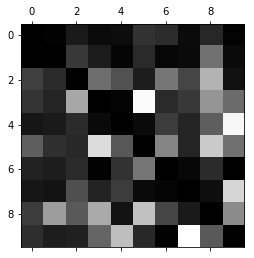

In [129]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [130]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [131]:
knn_clf.predict([some_digit])

array([[ True,  True]])